<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-des-performances-sur-les-données-de-Auto-Data-Set" data-toc-modified-id="Analyse-des-performances-sur-les-données-de-Auto-Data-Set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse des performances sur les données de <em>Auto Data Set</em></a></span><ul class="toc-item"><li><span><a href="#Utilisation-d'un-ensemble-de-validation---Train/test-split" data-toc-modified-id="Utilisation-d'un-ensemble-de-validation---Train/test-split-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Utilisation d'un ensemble de validation - Train/test split</a></span></li><li><span><a href="#Utilisation-de-la-validation-croisée" data-toc-modified-id="Utilisation-de-la-validation-croisée-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Utilisation de la validation croisée</a></span></li></ul></li><li><span><a href="#Estimation-des-performances-d'un-modèle-de-régression-linéaire" data-toc-modified-id="Estimation-des-performances-d'un-modèle-de-régression-linéaire-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Estimation des performances d'un modèle de régression linéaire</a></span></li><li><span><a href="#Validation-sur-la-base-Default" data-toc-modified-id="Validation-sur-la-base-Default-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Validation sur la base <code>Default</code></a></span><ul class="toc-item"><li><span><a href="#Modèle" data-toc-modified-id="Modèle-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Modèle</a></span></li><li><span><a href="#Erreur-de-prédiction-par-validation." data-toc-modified-id="Erreur-de-prédiction-par-validation.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Erreur de prédiction par validation.</a></span></li><li><span><a href="#Recommencer" data-toc-modified-id="Recommencer-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Recommencer</a></span></li><li><span><a href="#Pertinence-d'une-nouvelle-variable----Validation" data-toc-modified-id="Pertinence-d'une-nouvelle-variable----Validation-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Pertinence d'une nouvelle variable -- Validation</a></span></li><li><span><a href="#Pertinence-d'une-nouvelle-variable----Validation-croisée" data-toc-modified-id="Pertinence-d'une-nouvelle-variable----Validation-croisée-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Pertinence d'une nouvelle variable -- Validation croisée</a></span></li><li><span><a href="#Estimées-des-erreurs-standard-par-Bootstrap" data-toc-modified-id="Estimées-des-erreurs-standard-par-Bootstrap-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Estimées des erreurs standard par Bootstrap</a></span><ul class="toc-item"><li><span><a href="#Direct" data-toc-modified-id="Direct-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Direct</a></span></li><li><span><a href="#Par-bootstrap" data-toc-modified-id="Par-bootstrap-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Par bootstrap</a></span></li></ul></li></ul></li></ul></div>

Les exercices proposés dans cette séance de travaux pratiques sont adaptés de notre [livre de référence](http://www-bcf.usc.edu/~gareth/ISL/), chapitre 5, pp. 190-197 ainsi que des exercices plus avancés pp 199-201. 

Avant de vous lancer, vous installerez les packages utiles en lançant


In [2]:
import sklearn

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score # (sklearn > 0.2)
#from sklearn.cross_validation import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline
plt.style.use('seaborn-v0_8-white')

Les datasets utiles peuvent être obtenus ici : [https://vincentarelbundock.github.io/Rdatasets/datasets.html](https://vincentarelbundock.github.io/Rdatasets/datasets.html)

# Analyse des performances sur les données de *Auto Data Set*

Chargez les données contenues dans le fichier csv `Auto` dans un dataframe `df`, et éliminez les lignes contenant des valeurs inconnues (NA).  Examinez quelles sont les caractéristqies de ce dataframe. 

/!\ Les NA sint désignés par '?'

In [4]:
df = pd.read_csv('Auto.csv', na_values='?').dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    392 non-null    int64  
 1   mpg           392 non-null    float64
 2   cylinders     392 non-null    int64  
 3   displacement  392 non-null    float64
 4   horsepower    392 non-null    int64  
 5   weight        392 non-null    int64  
 6   acceleration  392 non-null    float64
 7   year          392 non-null    int64  
 8   origin        392 non-null    int64  
 9   name          392 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 30.8+ KB


On utilisera à nouveau les données `Auto`. 
Vous obtiendrez la description des variables par les lignes suivantes : 

In [5]:
from IPython.display import HTML

with open("R_ Auto Data Set.html",'r') as f: 
    display(HTML(f.read()))

Auto,R Documentation


## Utilisation d'un ensemble de validation - Train/test split

Vous explorerez l'utilisation d'un ensemble de validation pour estimer l'erreur de prédiction pour différents modèles de régression ajustés sur les données `Auto`. 

1) Pour commencer, il faut donc définir un ensemble d'apprentissage et un ensemble de validation. Vous utiliserez pour ce faire la fonction `sample`. 

1) On utilisera la librairie scikit learn. Séparez votre dataframe en une matrice X des variables expicatives, et une réponse y. Vous chercherez à prédire `mpg` en fonction de `horsepower` (et plus tard de `horsepower` et de ses puissances)

Vous utiliserez ensuite `train_test_split` pour séparer vos données en des données d'apprentissage et de test (validation). Vous prendrez 50% des données dans chaque ensemble. 

In [6]:
X = df[['horsepower']]
y = df['mpg']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.5, random_state=21)

In [8]:
idx = range(df.shape[0])
train_idx = np.random.choice(idx, size=int(round(df.shape[0]/2)))
test_idx = [index for index in idx if index not in train_idx]

2) Vous effectuerez ensuite une régression de `mpg` sur `horsepower`, en envisageant des régressions polynomiales, pour des degrés allant de 1 à 4. Utiliser la classe `LinearRegression()` de `sklearn.linear_model`. 

Commencez par une régression linéaire avec un ordre 1

In [9]:
model = sklearn.linear_model.LinearRegression()

In [10]:
model.fit(X_train,y_train)
print("score", model.score(X_train,y_train))
eqm_train = mean_squared_error(y_train, model.predict(X_train))
eqm_test = mean_squared_error(y_test, model.predict(X_test))
print("Erreur moyenne (train) : ", eqm_train)
print("Erreur moyenne (test) : ", eqm_test)

score 0.596503689620603
Erreur moyenne (train) :  25.128482562321295
Erreur moyenne (test) :  23.061163401524546


Pour ajouter des variables constituées par les puissances successives de `horsepower`, vous utiliserez la classe `PolynomialFeatures()`, que vous instancierez et dont vous utiliserez la méthode `fit_transform`.  Tester avec un ordre 2.

In [11]:
ordre = 2
poly = PolynomialFeatures(degree=ordre)
X_poly = poly.fit_transform(df[['horsepower']])

In [13]:
df[['horsepower']].head()

,horsepower
0,130
1,165
2,150
3,150
4,140


In [14]:
X_poly

array([[1.0000e+00, 1.3000e+02, 1.6900e+04],
       [1.0000e+00, 1.6500e+02, 2.7225e+04],
       [1.0000e+00, 1.5000e+02, 2.2500e+04],
       ...,
       [1.0000e+00, 8.4000e+01, 7.0560e+03],
       [1.0000e+00, 7.9000e+01, 6.2410e+03],
       [1.0000e+00, 8.2000e+01, 6.7240e+03]])

Effectuez maintenant la régression linéaire avec un polynôme d'ordre 2 en `horsepower`, après avoir séparé vos données en train et test (comme précédemment)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5,
                                                    random_state=117)

In [16]:
model = sklearn.linear_model.LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
print("score", model.score(X_train,y_train))
eqm_train = mean_squared_error(y_train, model.predict(X_train))
eqm_test = mean_squared_error(y_test, model.predict(X_test))
print("Erreur moyenne (train) : ", eqm_train )
print("Erreur moyenne (test) : ", eqm_test )

score 0.6866858730765223
Erreur moyenne (train) :  18.37307250793768
Erreur moyenne (test) :  19.680109650082244


On envisage maintenant des ordre allant de 0 à 12

- pour chacun des degrés de polynôme, 
  - effectuer une régression avec le dataset Auto, **sur l'ensemble d'apprentissage** sélectionné question 1)
  - tester les performances **sur la base de test** en calculant la moyenne de l'écart quadratique entre `mpg` et la valeur prédite. Méthode `predict`
- tracer le résultat Erreur = f(ordre),  et/ou imprimer les performances obtenues
- Effectuer l'ensemble de la procédure pour différentes valeurs du random seed, c'est-à-dire différents splits training/validation -- tracer l'ensemble des courbes obtenus
- Quel degré faudrait-il adopter au vu de ces résultats, que penser de la stabilité des différentes estimées de l'erreur de prédiction ?

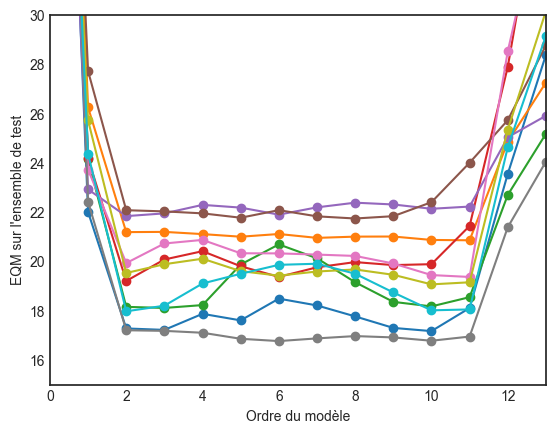

In [17]:
ordremax = 14
ordres  = range(ordremax)
Eqm_train = np.zeros(shape=ordremax)
Eqm_test = np.zeros(shape=ordremax)
Eqm_test_cumul = np.zeros(shape=ordremax)
verbose = False
for split in np.random.choice(range(2000),size=10):
    for order in range(ordremax):
        if verbose: print("ordre = ", order, 10*'*')
        # polynomial features
        poly = PolynomialFeatures(degree=order)
        X_poly = poly.fit_transform(df[['horsepower']])
        # split train/test
        X_train, X_test, y_train, y_test = train_test_split(X_poly, y,
                                                            test_size=0.5, random_state=split)
        # modèle
        model = sklearn.linear_model.LinearRegression(fit_intercept=True)
        model.fit(X_train,y_train)
        # performances du modèle
        if verbose: print("score", model.score(X_train,y_train))
        eqm_train = mean_squared_error(y_train, model.predict(X_train))
        eqm_test = mean_squared_error(y_test, model.predict(X_test))
        Eqm_train[order] = eqm_train    
        Eqm_test[order] = eqm_test
        Eqm_test_cumul[order]  = Eqm_test_cumul[order]  + eqm_test
        if verbose: print("Erreur moyenne (train) : ", eqm_train)
        if verbose: print("Erreur moyenne (test) : ", eqm_test)
    plt.plot(ordres, Eqm_test, '-o')  
    plt.xlabel("Ordre du modèle")
    plt.ylabel("EQM sur l'ensemble de test")
    plt.axis([0, 13, 15, 30])

Tracer la moyenne des erreurs (sur les différents splits), en fonction de l'ordre du modèle. 

Text(0, 0.5, "EQM sur l'ensemble de test (moyenne)")

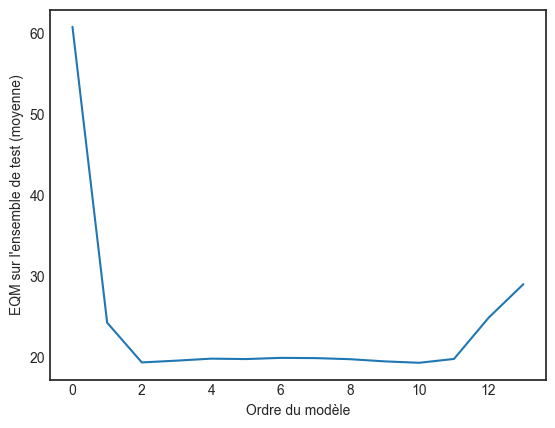

In [18]:
plt.plot(ordres, Eqm_test_cumul/10)
plt.xlabel("Ordre du modèle")
plt.ylabel("EQM sur l'ensemble de test (moyenne)")

Pas si simple de choisir le degré "optimal" lorque qu'on teste dfférents couples training/validation. le handicap est ici le faible nombre de données qui donne une très grande variabilité. Ce qui est net c'est que passer à un degré 2 donne une nette amélioration ; après c'est très variable suivant les différents assais. Dans ces conditions, on aura tendance à être très conservateur et à privilégier les ordres les plus faibles (donc le moins de variance).



## Utilisation de la validation croisée

Pour utiliser la validation croisée en Python, vous utiliserez tout simplement la méthode `cross_val_score` de la librairie `sklearn.cross_validation`. 

In [19]:
# k-fold CV
folds = 10

model = linear_model.LinearRegression()
cv_score = np.zeros(ordremax)

for order in ordres:
    poly = PolynomialFeatures(order)
    X_poly = poly.fit_transform(df[['horsepower']])
    cv_score[order] = cross_val_score(model, X_poly, y, cv=10, scoring='neg_mean_squared_error').mean()

Text(0, 0.5, 'EQM par validation croisée')

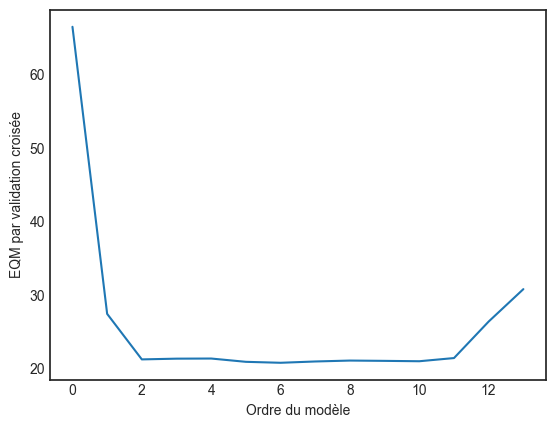

In [20]:
plt.plot(ordres, -cv_score)
plt.xlabel("Ordre du modèle")
plt.ylabel("EQM par validation croisée")

In [21]:
np.argmin(-cv_score)

6

# Estimation des performances d'un modèle de régression linéaire

Comme on l'a vu en cours, il est possible d'utiliser le bootstrap afin de quantifier la qualité des estimées et prédictions des méthodes d'appprentissage statistique. Cela s'applique par exemple à la régression linéaire toute simple. On va considérer la régression habituelle  `mpg~horsepower` pour le dataset `Auto`, pour des degrés 1 et 2, et comparer les performances affichées à l'aide des formules explicites (connues dans ce cas simple), et l'évaluation numérique donnée par le bootstrap. 

1 -  Utiliser la fonction `lm` du TP sur la régression linéaire pour avoir effectuer la prédiction linéaire ci-dessus, en ayant accès aux performances (écart-type, p-values, etc)

In [22]:
from LinearRegression_in_Python_like_in_R import lm, summary

In [23]:
model = lm('mpg~horsepower+I(horsepower**2)', data=df)
model.summary()

Call
smf.ols('mpg~horsepower+I(horsepower**2)', data=...)

Coefficients:
                     Estimate  Std. Error    t value       Pr(>|t|) code
Intercept           56.900100    1.800427  31.603673  1.740911e-109  ***
horsepower          -0.466190    0.031125 -14.978164   2.289429e-40  ***
I(horsepower ** 2)   0.001231    0.000122  10.080093   2.196340e-21  ***

Residuals:
         Min        1Q    Median        3Q       Max
0 -14.713545 -2.594292 -0.085934  2.286798  15.89607
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.3739 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic: 428.018 on 2 and 389 DF,  p-value: 5.400e-99


Les coefficients du modèle peuvent être accédés, sous leur nom, par `model.params['nom_du_coeff']` (et `model.params` pour examiner ces coefficients)

2 -  Créer une fonction `bootfn` qui prenne en entrée les données et un vecteur d'index et retourne les coefficients de la régression linéaire correspondante. 

In [24]:
def bootfn(data, index):
    model = lm('mpg~horsepower+I(horsepower**2)', data=data.loc[I,:])
    return model.params

3 -  Utiliser la fonction `random.choice` pour rééchantillonner les données, puis calculer les estimées correspondantes par `bootfn`. Réitérer avec une autre valeur de seed. Comparer ces résultats. 


In [25]:
np.random.seed(27)
I = np.random.choice(df.shape[0], size=100, )  # Choix des index
bootfn(df, I)

Intercept             56.316755
horsepower            -0.451222
I(horsepower ** 2)     0.001142
dtype: float64

In [26]:
np.random.seed(45)
I = np.random.choice(df.shape[0], size=100, )  # Choix des index
bootfn(df, I)

Intercept             58.743686
horsepower            -0.504709
I(horsepower ** 2)     0.001388
dtype: float64

4 -  Utiliser maintenant la fonction `boot` pour calculer un millier de ces estimées. Stocker les résultats dans un Dataframe.  Tracer les histogrammes correspondants, calculer les moyennes (`mean`)  et écarts-types (`std`)

In [27]:
B = 1000
coeffs_boot = pd.DataFrame(index=range(B), columns=['intercept', 'horsepower', 'horsepower**2'])

for b in range(B):
    I = np.random.choice(df.shape[0], size=df.shape[0], )  # Choix des index
    intercept, h, h2 = bootfn(df, I)
    coeffs_boot.iloc[b] = intercept, h, h2 

In [28]:
coeffs_boot

,intercept,horsepower,horsepower**2
0,60.042631,-0.509134,0.001352
1,57.852288,-0.474407,0.001231
2,54.31715,-0.429092,0.001089
3,58.711568,-0.494808,0.001337
4,52.343564,-0.398388,0.001013
...,...,...,...
995,59.904518,-0.508743,0.00137
996,56.007764,-0.449487,0.001168
997,55.968163,-0.449961,0.00117
998,55.597946,-0.441816,0.001129


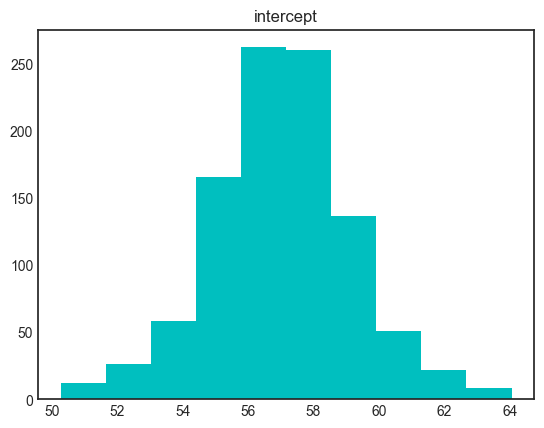

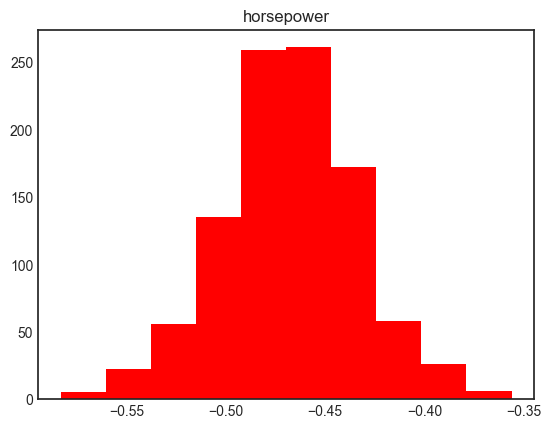

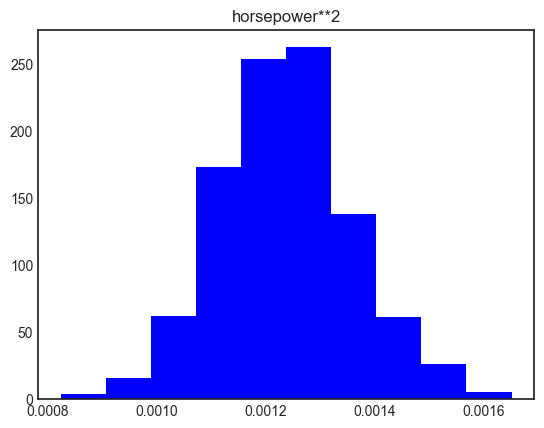

In [29]:
from itertools import cycle
c = cycle(['c', 'r', 'b', 'g'])

for col in coeffs_boot.columns:
    plt.figure()
    plt.hist(coeffs_boot[col].values.astype(float), color=next(c))
    plt.title(col)

In [30]:
coeffs_boot.mean()

intercept        57.009171
horsepower        -0.46774
horsepower**2     0.001236
dtype: object

In [31]:
coeffs_boot.std()

intercept        2.127831
horsepower       0.034137
horsepower**2    0.000124
dtype: object

5 - Comparer ces résultats à ceux qu'on relève sur le résumé `summary` de la fonction `lm`. 

In [32]:
summary(model)

Call
smf.ols('mpg~horsepower+I(horsepower**2)', data=...)

Coefficients:
                     Estimate  Std. Error    t value       Pr(>|t|) code
Intercept           56.900100    1.800427  31.603673  1.740911e-109  ***
horsepower          -0.466190    0.031125 -14.978164   2.289429e-40  ***
I(horsepower ** 2)   0.001231    0.000122  10.080093   2.196340e-21  ***

Residuals:
         Min        1Q    Median        3Q       Max
0 -14.713545 -2.594292 -0.085934  2.286798  15.89607
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.3739 on 389 degrees of freedom
Multiple R-squared:  0.6876,	Adjusted R-squared:  0.686 
F-statistic: 428.018 on 2 and 389 DF,  p-value: 5.400e-99


# Validation sur la base `Default`


La base `Default` est un exemple célèbre de jeu de données pour un problème de classification.
On utilisera ici une régression logistique. On estimera l'erreur de prédiction en utilisant un ensemble de validation, puis on testera l'importance des variables dans le modèle. Enfin, on estimera les statistiques sur les coefficients par bootstrap. 

## Modèle 
Charger la base defaut, fichier `default.csv`, choisir un seed, et apprendre un modèle de régression logistique pour `default~income+balance` (donc sans `student`). Afficher les résultats.  

In [5]:
D = pd.read_csv("default.csv", index_col=0)

In [34]:
D.head()

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879


In [8]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
#
from GLMRegression_in_Python_like_in_R import GLMsummary, glm_residplot
from LinearRegression_in_Python_like_in_R import lm, summary, vif

Apprendre une régression logistique pour prédire `default` en fonction des autres variables et afficher les performances

In [36]:
glm_default = smf.glm("default ~ student + balance + income", 
                      D, family=sm.families.Binomial())

res = glm_default.fit()
GLMsummary(res)

Dep. Variable:,"['default[No]', 'default[Yes]']",No. Observations:,10000
Model:,GLM,Df Residuals:,9996
Model Family:,Binomial,Df Model:,3
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-785.77
Date:,"Sat, 16 Dec 2023",Deviance:,1571.5
Time:,01:19:39,Pearson chi2:,7.00e+03
No. Iterations:,9,Pseudo R-squ. (CS):,0.1262
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,10.8690,0.492,22.079,0.000,9.904,11.834,4.995494e-108,***
student[T.Yes],0.6468,0.236,2.738,0.006,0.184,1.110,6.189022e-03,**
balance,-0.0057,0.000,-24.737,0.000,-0.006,-0.005,4.331515e-135,***
income,-3.033e-06,8.2e-06,-0.370,0.712,-1.91e-05,1.3e-05,7.115254e-01,


In [ ]:
%load_ext rpy2.ipython

In [1]:
%%R
library(ISLR)
set.seed(1)
glm.fit = glm(default ~ income + balance + C(student), data = Default, family = "binomial")
summary(glm.fit)

UsageError: Cell magic `%%R` not found.


## Erreur de prédiction par validation. 

Estimez l'erreur de prédiction pour ce modèle. Pour cela :

1. Séparer les données en un ensemble d'apprentissage et un ensemble de validation (train=3/4 des données, test=le 1/4 restant)
2. Apprendre le modèle
3. Calculer les prédictions sur la base de test, et le taux d'erreur en seuillant la probabilité a posteriori à 0.5

In [6]:
# 1
L = len(D.index)
J = D.index>0
J[np.random.randint(0, L, int(0.75*L))] = False
Train = D[J]
Test = D[~J]
# autre approche
Train, Test = train_test_split(D, test_size=0.25)

In [9]:
# 2
glm_default = smf.glm("default ~  balance + income", 
                      Train, family=sm.families.Binomial())

res = glm_default.fit()
GLMsummary(res)

Dep. Variable:,"['default[No]', 'default[Yes]']",No. Observations:,7500
Model:,GLM,Df Residuals:,7497
Model Family:,Binomial,Df Model:,2
Link Function:,Logit,Scale:,1.0000
Method:,IRLS,Log-Likelihood:,-590.40
Date:,"Sat, 16 Dec 2023",Deviance:,1180.8
Time:,01:23:35,Pearson chi2:,4.17e+03
No. Iterations:,9,Pseudo R-squ. (CS):,0.1238
Covariance Type:,nonrobust,,


,coef,std err,z,P>|z|,[0.025,0.975],p-value,Code
Intercept,11.6483,0.511,22.811,0.000,10.647,12.649,3.591414e-115,***
balance,-0.0057,0.000,-21.297,0.000,-0.006,-0.005,1.200620e-100,***
income,-2.188e-05,5.79e-06,-3.778,0.000,-3.32e-05,-1.05e-05,1.578159e-04,***


In [10]:
# 3
probas_preds = res.predict(Test)
preds = probas_preds < 0.5
C = pd.crosstab(Test['default'], preds)
C

col_0,False,True
default,,
No,2406,8
Yes,54,32


In [11]:
# Erreur = 1 - accuracy
1 - np.sum(np.diag(C))/np.sum(np.sum(C))

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


0.024800000000000044

In [12]:
%%R
set.seed(1)
train = sample(nrow(Default), 3 * nrow(Default)/4)  #1.
Default.train = Default[train, ]
Default.test = Default[-train, ]

glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")  #2.
glm.probs = predict(glm.fit, Default.test, type = "response")  #3.
glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
mean(glm.pred != Default.test$default)  #4. accuracy

UsageError: Cell magic `%%R` not found.


## Recommencer

Répéter le processus précédent un certain nombre de fois (par exemple 300 fois), en utilisant différentes segmentations train-test des données. Commenter. 

In [16]:
M = 300
Seeds = np.random.randint(0,10000, M)
Erreur = np.zeros(M)
for k, seed in enumerate(Seeds):

    Train, Test = train_test_split(D, test_size=0.25, random_state=seed)
    glm_default = smf.glm("default ~  balance + income ", 
                          Train, family=sm.families.Binomial())
    res = glm_default.fit()
    probas_preds = res.predict(Test)
    preds = probas_preds < 0.5
    C = pd.crosstab(Test['default'], preds)
    # Erreur = 1 - accuracy
    Erreur[k] = 1 - np.sum(np.diag(C))/np.sum(np.sum(C))

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

In [17]:
%matplotlib widget
plt.figure(figsize = (10,5))
print(np.mean(Erreur))
_ = plt.hist(Erreur)

ModuleNotFoundError: No module named 'ipympl'

In [ ]:
%%R
for (seed in c(15, 5, 34)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    print(mean(glm.pred != Default.test$default))
}

Ci-dessous une boucle sur 300 essais. Cela commence à devenir long. 

In [ ]:
%%R
z = c()
k = 0
for (seed in seq(300)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    z[k] = mean(glm.pred != Default.test$default)
    k = k + 1
}

print(mean(z))

hist(z,20)

## Pertinence d'une nouvelle variable -- Validation

Considérons maintenant un modèle qui prédit la probabilité de défaut à partir de  income, balance, et d'une variable catégorielle sur student. Estimer le taux d'erreur sur un ensemble validation, pour plusieurs ensembles. Commenter sur l'utilité d'inclure ou non la variable student ?

In [18]:
M = 300
Seeds = np.random.randint(0,10000, M)
Erreur = np.zeros(M)
for k, seed in enumerate(Seeds):

    Train, Test = train_test_split(D, test_size=0.25, random_state=seed)
    glm_default = smf.glm("default ~ student + balance + income ", 
                          Train, family=sm.families.Binomial())
    res = glm_default.fit()
    probas_preds = res.predict(Test)
    preds = probas_preds < 0.5
    C = pd.crosstab(Test['default'], preds)
    # Erreur = 1 - accuracy
    Erreur[k] = 1 - np.sum(np.diag(C))/np.sum(np.sum(C))

print(np.mean(Erreur))    

C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old

KeyboardInterrupt: 

In [ ]:
%%R
zz = c()
k = 0
for (seed in seq(300)) {
    set.seed(seed)
    train = sample(nrow(Default), nrow(Default) - nrow(Default)/4)
    Default.train = Default[train, ]
    Default.test = Default[-train, ]
    glm.fit = glm(default ~ income + balance + student, data = Default.train, family = "binomial")
    glm.probs = predict(glm.fit, Default.test, type = "response")
    glm.pred = ifelse(glm.probs > 0.5, "Yes", "No")
    zz[k] = mean(glm.pred != Default.test$default)
    k = k + 1
}
mean(zz)

Il ne semble pas qu'ajouter cette variable soit complètement pertinent car le taux d'erreur moyen est un peu supérieur... Mais cet effet reste faible, et à l'intérieur de l'intervalle de confiance. 

## Pertinence d'une nouvelle variable -- Validation croisée

Effectuer la même étude que précédemment, mais en évaluant les performances par validation croisée. Que concluerait-on cette fois ? Comment expliquer les différences éventuelles entre les performances ?

Pour utiliser la validation croisée de sklearn sous Python, vous devrez aussi définir l'estimateur à partir de la classe LogisticRegression, ainsi qu'encoder la variable catégorielle `student`

In [ ]:
D["student_enc"] = D["student"].replace({"No":0, "Yes":1}) 

In [ ]:
# Sans student
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100000)
X = D[['balance', 'income' ]]
y = D['default']
out = cross_val_score(clf, X, y, cv = 10, )
print(out)
print("précision :", np.mean(out))
print("erreur :", 1 - np.mean(out))

In [ ]:
# Avec student
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=100000)
X = D[['balance', 'income', 'student_enc' ]]
y = D['default']
out = cross_val_score(clf, X, y, cv = 10, )
print(out)
print("précision :", np.mean(out))
print("erreur :", 1 - np.mean(out))

Il semble que l'erreur augmente avec la variable student, qu'il ne faudrait donc pas conserver. 

Le R ci-dessous dit le contraire ; c'est ennuyeux..

In [ ]:
%%R
library(boot)
cv.error.10 = c()
for (i in 1:10) {
    glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
    cv.error.10[i] = cv.glm(Default, glm.fit, K = 10)$delta[1]
}
print(cv.error.10)
#mean(cv.error.10) sd(cv.error.10) plot(cv.error.10,type='l')
print(mean(cv.error.10))

In [ ]:
%%R
cv.error.10=c()
for (i in 1:1) {
    glm.fit = glm (default~income+balance+student,data=Default, family="binomial") 
    cv.error.10[i]= cv.glm (Default, glm.fit, K =10)$delta[1]
}
cv.error.10
#mean(cv.error.10)
#sd(cv.error.10)
#plot(cv.error.10,type='l')
print(mean(cv.error.10))

Cette fois-ci, il semble que l'on devrait garder Student ; mais encore une fois la différence est extrèmement faible. Les différences de performances entre l'approche validation et la validation croisée viennent du fait que dans la validation croisée, on utilise un apprentissage sur plus de données. Donc un modèle mieux appris.

## Estimées des erreurs standard par Bootstrap

On poursuit avec la régression logistique et les données `Default`. On va maintenant comparer les erreurs standard sur le coefficients soit calculées analytiquement (et lues sur la sortie de `glm`), soit en utilisant un bootstrap. 

### Direct
En utilisant `summary()` (ou `GLMsummary`) et `glm()`, déterminez les erreurs standards sur les coefficients associées à `income` `balance` dans une régression logistique. 

In [ ]:
glm_default = smf.glm("default ~ balance + income", 
                      D, family=sm.families.Binomial())

res = glm_default.fit()
GLMsummary(res)

In [ ]:
%%R
set.seed(1)
glm.fit = glm(default ~ income + balance, data = Default, family = "binomial")
summary(glm.fit)

### Par bootstrap

1.  Écrire une fonction `boot.fn()` ou `bootfn`sous Python, qui reçoit `Default` ainsi qu'un index des observations et rend les estimées des coefficients pour  income et balance.
2. Utiliser le bootstrap pour calculer les erreurs standard. Comparer avec les résultats précédents et commenter..


In [ ]:
def bootfn(data, index):
    model = smf.glm('default~balance+income', data=data.iloc[index,:], family=sm.families.Binomial()).fit()
    return model.params

In [ ]:
D.shape[0]

In [ ]:
# Essai avec un seed
np.random.seed(27)
I = np.random.choice(D.shape[0], size=D.shape[0] )  # Choix des index
bootfn(D, I)

In [ ]:
B = 1000
coeffs_boot = pd.DataFrame(index=range(B), columns=['intercept', 'balance', 'income'])

for b in range(B):
    I = np.random.choice(D.shape[0], size=D.shape[0], )  # Choix des index
    intercept, bal, inc = bootfn(D, I)
    coeffs_boot.iloc[b] = intercept, bal, inc
coeffs_boot.head()    

Les statistiques bootstrap :

In [ ]:
np.mean(coeffs_boot, axis=0)

In [ ]:
np.std(coeffs_boot, axis=0)

In [ ]:
# Coefficients obtenus par le calcul analytique (possible ici) dans statsmodels
res.bse

In [ ]:
# Et le résumé total
GLMsummary(res)

In [ ]:
%%R
boot.fn = function(data, index) {
    coefficients(glm(default ~ income + balance, data = data, subset = index, family = "binomial"))
}

boot.fn(Default, 1:nrow(Default))

In [ ]:
%%R
library(boot)
boot(Default, boot.fn, 1000)

In [ ]:
?boot

```r
## 
## ORDINARY NONPARAMETRIC BOOTSTRAP
## 
## 
## Call:
## boot(data = Default, statistic = boot.fn, R = 1000)
## 
## 
## Bootstrap Statistics :
##       original     bias    std. error
## t1* -1.154e+01 -8.008e-03   4.239e-01
## t2*  2.081e-05  5.871e-08   4.583e-06
## t3*  5.647e-03  2.300e-06   2.268e-04
```

Les estimées bootstrap sont très proches des valeurs fournies par `summary`. C'est bon signe !